In [125]:
import pandas as pd
import numpy as np
from plotnine import *

In [126]:
df = pd.read_csv("data/congressistas-no-twitter-20190322.csv", 
                      dtype={"temp_media": np.float64, "data": str})

In [127]:
display(df)

,id_parlamentar,casa,nome_eleitoral,partido,UF,twitter,conteudo,n,engajamento,engajamento_mediano
0,1023,senado,MARIA DO CARMO ALVES,DEM,SE,MariaSenadora,proprio,0,0,0.0
1,107283,câmara,GLEISI HOFFMANN,PT,PR,gleisi,proprio,206,737928,2575.5
2,108338,câmara,JAQUELINE CASSOL,PP,RO,jqcassol,proprio,26,36,1.0
3,109429,câmara,BENES LEOCÁDIO,PRB,RN,NaN,proprio,0,0,0.0
4,112437,câmara,JOÃO MARCELO SOUZA,MDB,MA,NaN,proprio,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
603,92699,câmara,FERNANDO MONTEIRO,PP,PE,fmonteirope,proprio,0,0,0.0
604,92776,câmara,STEFANO AGUIAR,PSD,MG,depstefano,proprio,5,20,5.0
605,93083,câmara,CACÁ LEÃO,PP,BA,CacaLeao‏,proprio,0,0,0.0
606,945,senado,ALVARO DIAS,PODE,PR,alvarodias_,proprio,878,638454,258.5


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_parlamentar       608 non-null    int64  
 1   casa                 608 non-null    object 
 2   nome_eleitoral       608 non-null    object 
 3   partido              608 non-null    object 
 4   UF                   608 non-null    object 
 5   twitter              549 non-null    object 
 6   conteudo             608 non-null    object 
 7   n                    608 non-null    int64  
 8   engajamento          608 non-null    int64  
 9   engajamento_mediano  608 non-null    float64
dtypes: float64(1), int64(3), object(6)
memory usage: 47.6+ KB


In [129]:
df.describe()

,id_parlamentar,n,engajamento,engajamento_mediano
count,608.000000,608.000000,6.080000e+02,608.000000
mean,145636.605263,83.409539,4.375367e+04,128.617599
std,69861.019264,157.358891,2.071817e+05,987.188268
min,22.000000,0.000000,0.000000e+00,0.000000
25%,75285.250000,0.000000,0.000000e+00,0.000000
50%,178868.500000,21.000000,7.550000e+01,2.000000
75%,204430.250000,101.000000,1.658000e+03,10.000000
max,207309.000000,1682.000000,2.822907e+06,19126.000000


### Quantidade de parlamentares com perfil no Twitter por partido

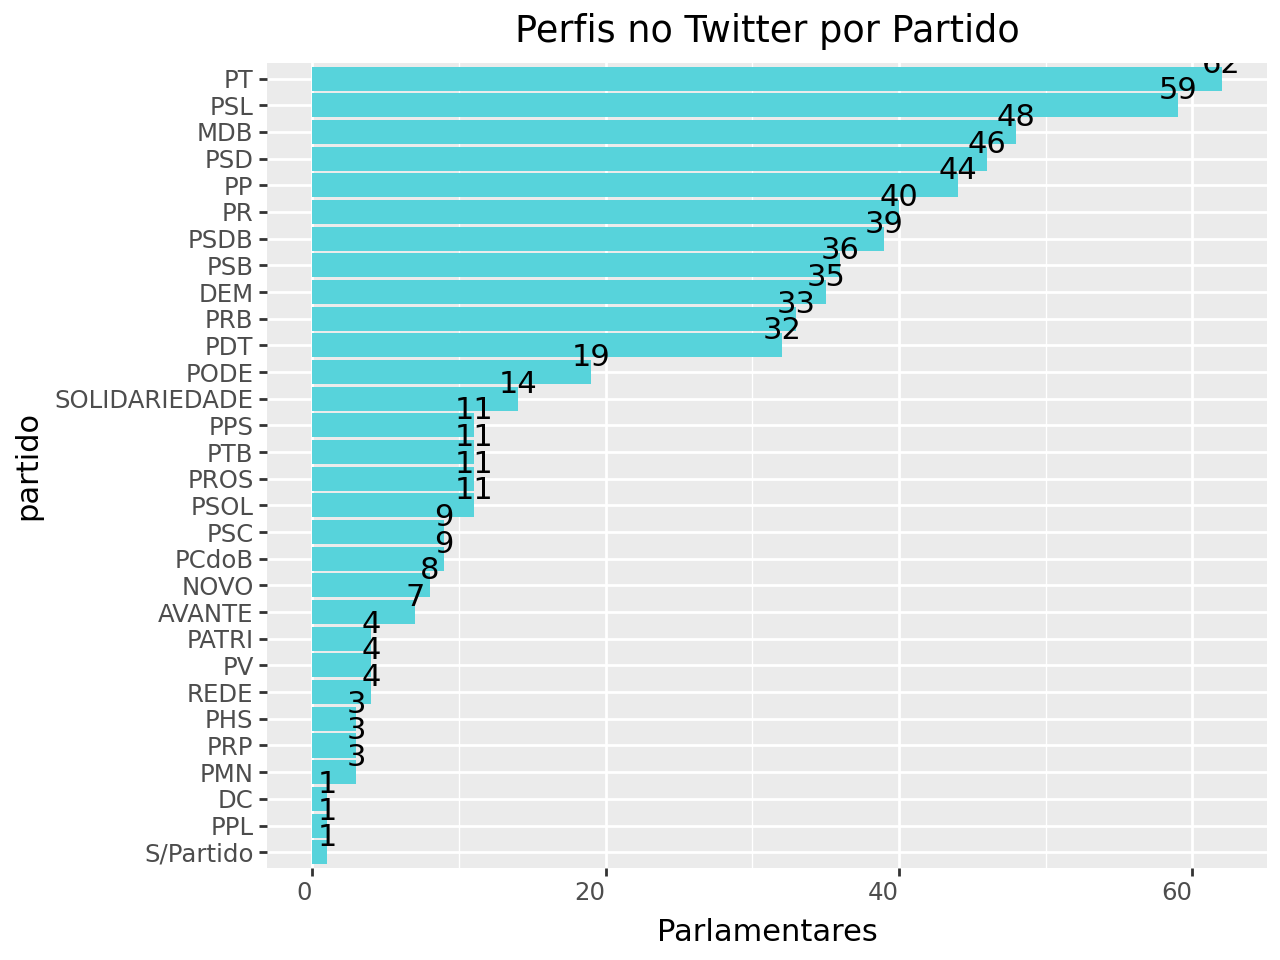

In [130]:
(ggplot(df) +
    aes(x='partido') +
    geom_bar(fill='#57d3db') +
    labs(title='Perfis no Twitter por Partido', y='Parlamentares') +
    theme(axis_text_x=element_text(angle=0, hjust=1)) +
    coord_flip() +
    scale_x_discrete(limits=df['partido'].value_counts().sort_values(ascending=True).index) +
    geom_text(aes(label='stat(count)'), stat='count', va='bottom', format_string='{:.0f}')
)


### Quantidade de parlamentares com perfil no Twitter por estado

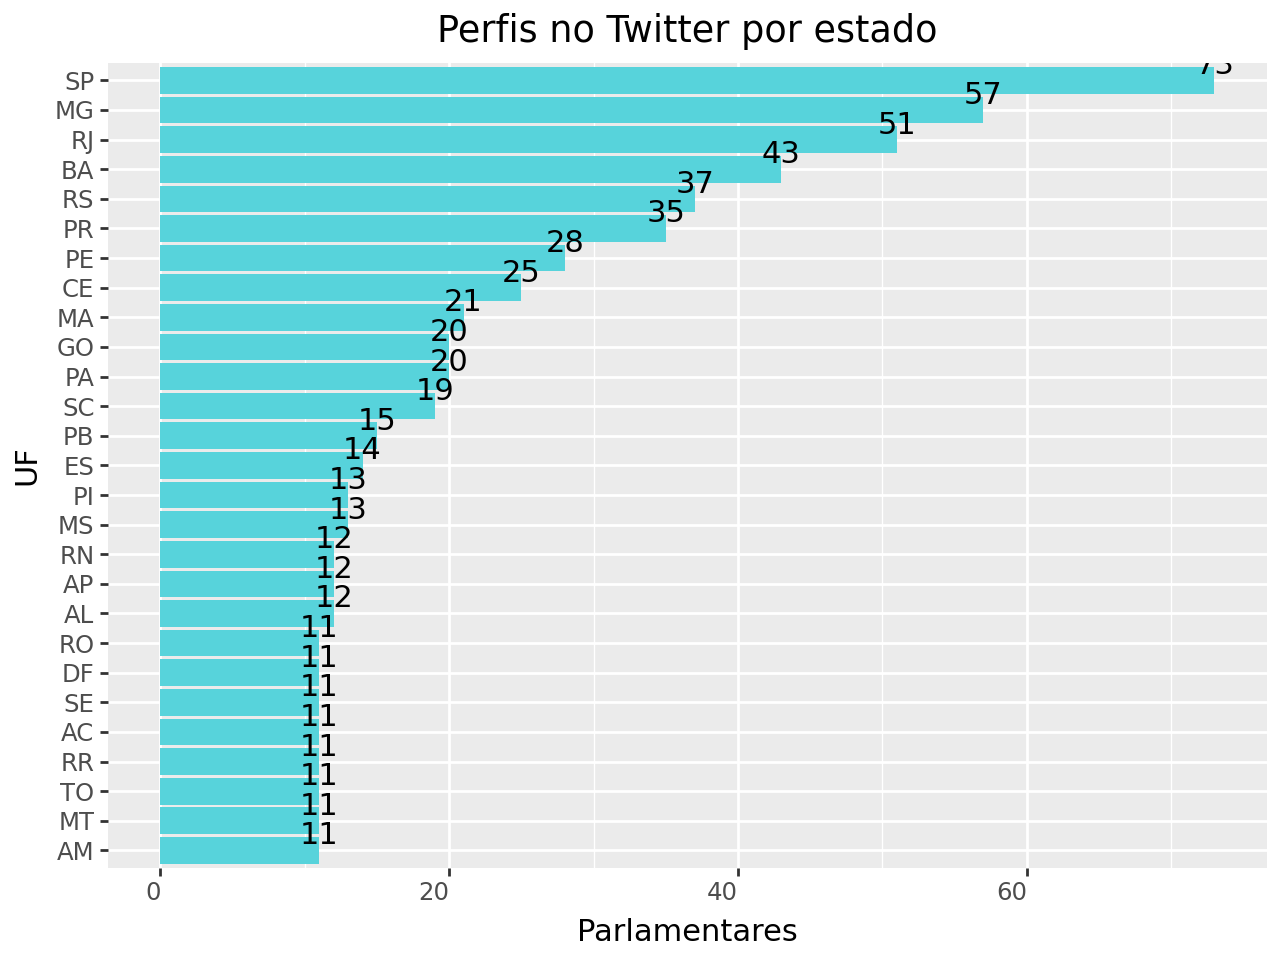

In [131]:
(ggplot(df) +
    aes(x='UF') +
    geom_bar(fill='#57d3db') +
    labs(title='Perfis no Twitter por estado', y='Parlamentares') +
    theme(axis_text_x=element_text(angle=0, hjust=1)) +
    coord_flip() +
    scale_x_discrete(limits=df['UF'].value_counts().sort_values(ascending=True).index) +
    geom_text(aes(label='stat(count)'), stat='count', va='bottom', format_string='{:.0f}')
)



### Quantidade de parlamentares que não fizeram nenhum twitter e quantidade de parlamentares que fizeram ao meno um twitter.

Número de parlamentares sem tweets: 240
Número de parlamentares com pelo menos um tweet: 368
Número total de parlamentares: 608


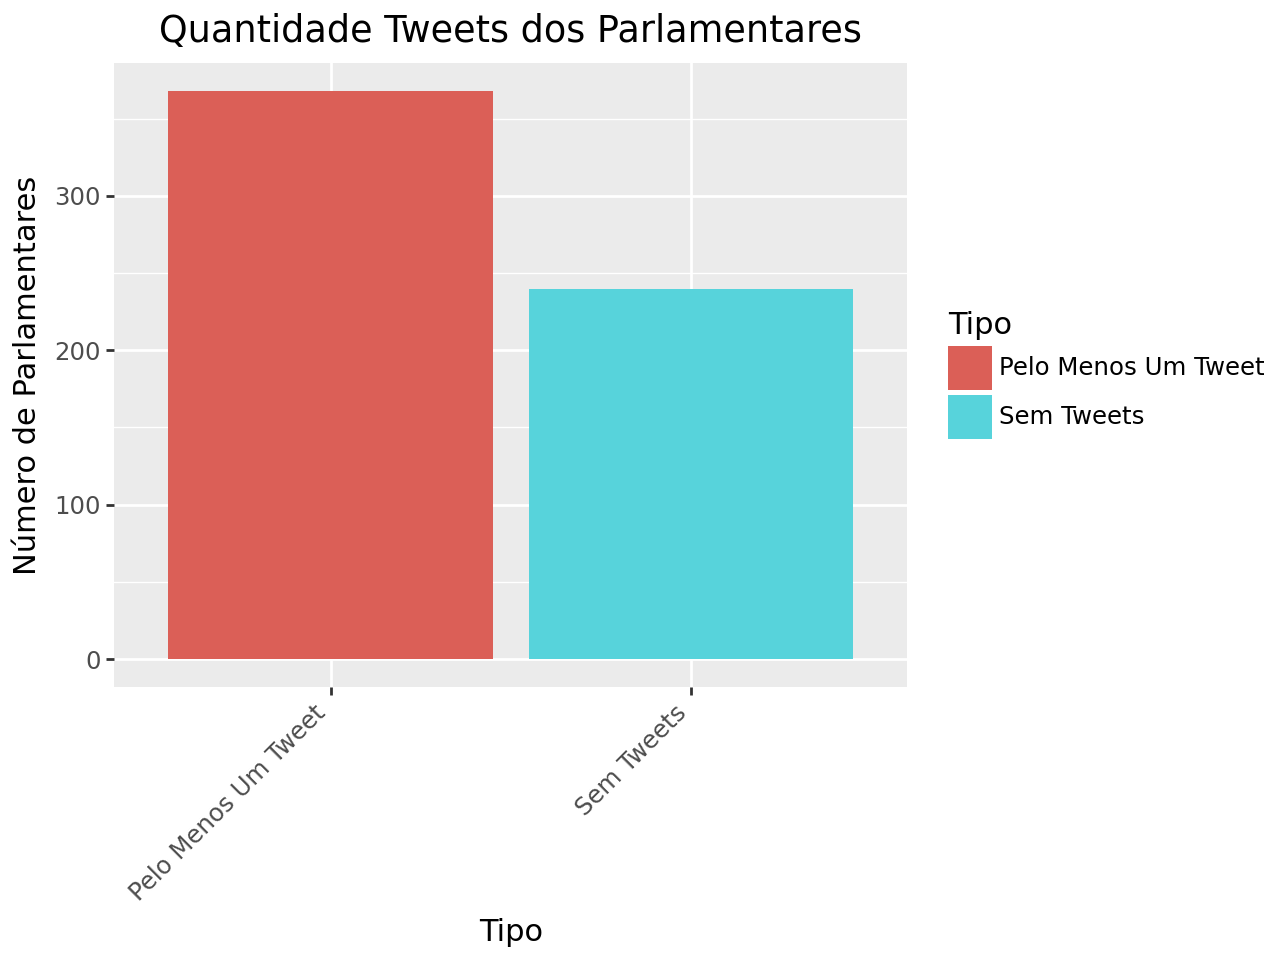

In [132]:
# Parlamentares que não fizeram nenhum tweet
num_sem_tweets = len(df[df['n'] == 0])

# Parlamentares que fizeram pelo menos um tweet
num_pelo_menos_um_tweet = len(df[df['n'] >= 1])

# Número total de parlamentares
total_parlamentares = len(df)

print(f"Número de parlamentares sem tweets: {num_sem_tweets}")
print(f"Número de parlamentares com pelo menos um tweet: {num_pelo_menos_um_tweet}")
print(f"Número total de parlamentares: {total_parlamentares}")

(ggplot() +
    geom_bar(data=pd.DataFrame({'Tipo': ['Sem Tweets', 'Pelo Menos Um Tweet'], 'Contagem': [num_sem_tweets, num_pelo_menos_um_tweet]}),
        mapping=aes(x='Tipo', y='Contagem', fill='Tipo'),
        stat='identity') +
    labs(title='Quantidade Tweets dos Parlamentares', y='Número de Parlamentares') +
    theme(axis_text_x=element_text(angle=45, hjust=1))
)


### Quantidade de tweets por UF

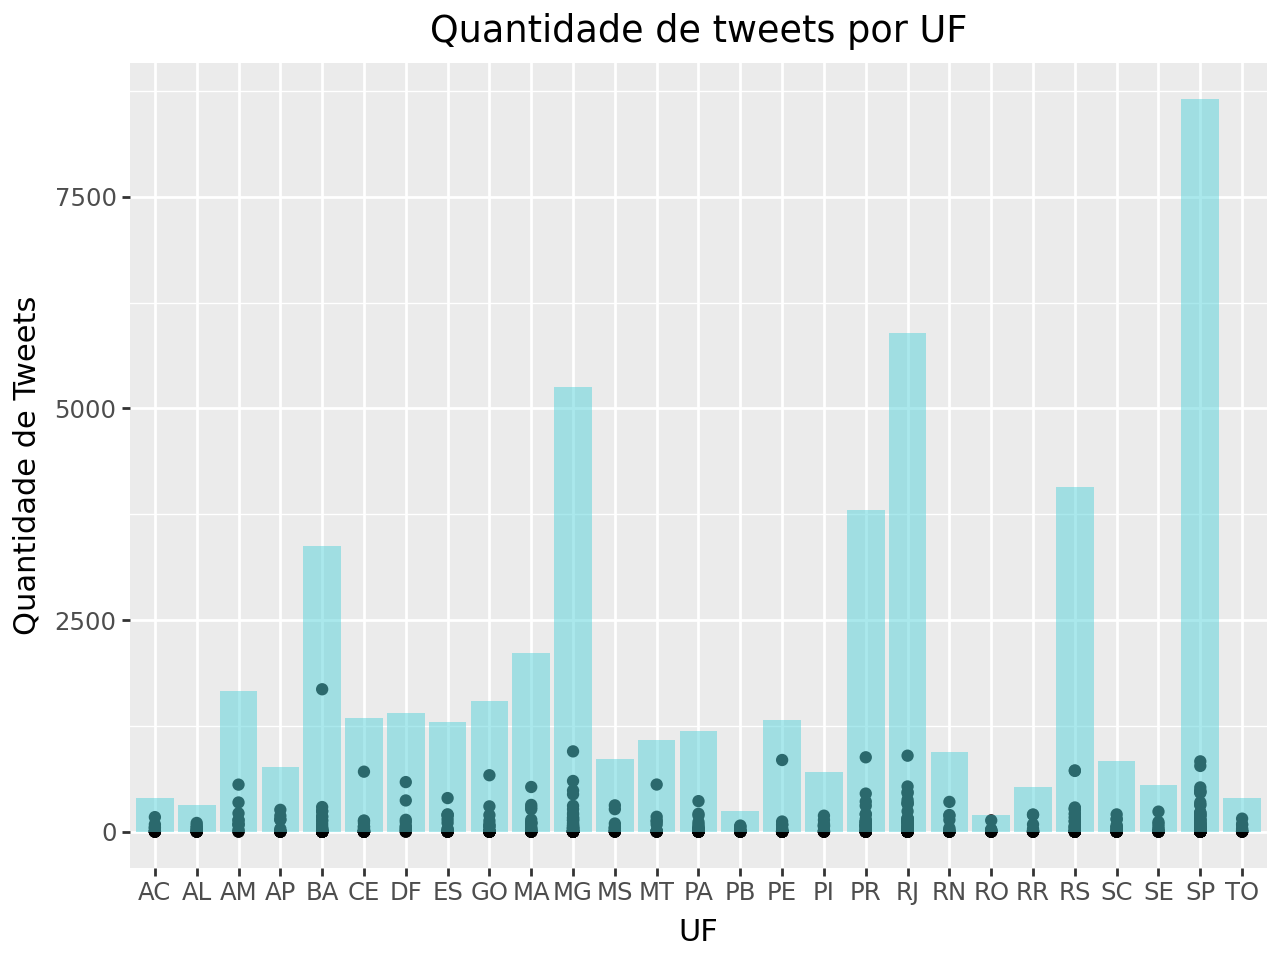

In [133]:
(ggplot(df) +
    aes(x='UF', y='n') +
    geom_point() +
    geom_bar(stat='identity', fill='#57d3db', alpha=0.5) +
    labs(title='Quantidade de tweets por UF', x='UF', y='Quantidade de Tweets')
)


### Os 10 parlamentares com mais tweets

In [134]:
top_10_parliamentarians = df.nlargest(10, 'n')
top_10_parliamentarians[['nome_eleitoral', 'n', 'UF', 'partido']]


,nome_eleitoral,n,UF,partido
522,BACELAR,1682,BA,PODE
124,MARGARIDA SALOMÃO,948,MG,PT
594,MARCELO FREIXO,897,RJ,PSOL
606,ALVARO DIAS,878,PR,PODE
468,HUMBERTO COSTA,846,PE,PT
407,ALEXANDRE FROTA,830,SP,PSL
370,CARLA ZAMBELLI,776,SP,PSL
484,LASIER MARTINS,723,RS,PODE
274,FERNANDA MELCHIONNA,717,RS,PSOL
41,JOSÉ GUIMARÃES,708,CE,PT


### Os 10 parlamentares com mais engajamento no Twitter

In [135]:
top_10_parliamentarians = df.nlargest(10, 'engajamento')
top_10_parliamentarians[['nome_eleitoral', 'engajamento', 'UF']]

,nome_eleitoral,engajamento,UF
370,CARLA ZAMBELLI,2822907,SP
409,JOICE HASSELMANN,2194507,SP
594,MARCELO FREIXO,1597682,RJ
329,TALÍRIA PETRONE,1189012,RJ
441,DAVID MIRANDA,1129205,RJ
213,PAULO EDUARDO MARTINS,1082269,PR
389,LUIZ PHILIPPE DE ORLEANS E BRAGANÇA,996508,SP
591,JANDIRA FEGHALI,947309,RJ
399,KIM KATAGUIRI,934180,SP
256,SARGENTO FAHUR,744388,PR


### Correlação entre a quantidade de tweets e a quantidade de engajamento

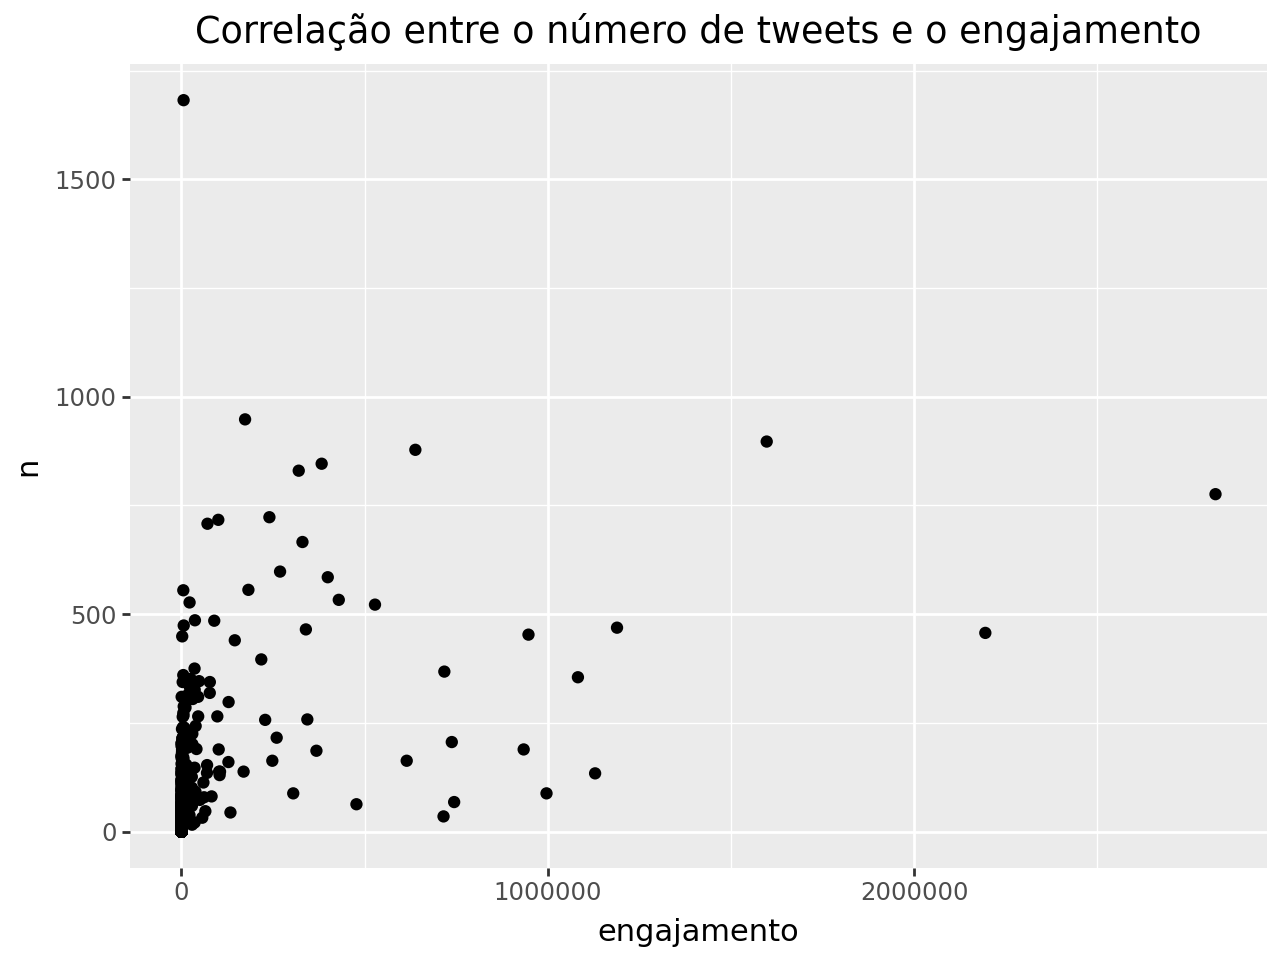

In [137]:
(ggplot(df) +
    aes(x='engajamento', y='n') +
    geom_point() +
    labs(title='Correlação entre o número de tweets e o engajamento', x='engajamento', y='n')
)

